<a href="https://colab.research.google.com/github/sanyamChaudhary27/ML_models_from_scratch/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)
        self.theta_ = np.zeros((self.n_classes_, X.shape[1]), dtype=np.float64)
        self.var_ = np.zeros((self.n_classes_, X.shape[1]), dtype=np.float64)
        self.class_prior_ = np.zeros(self.n_classes_, dtype=np.float64)

        for i, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.theta_[i, :] = X_c.mean(axis=0)
            self.var_[i, :] = X_c.var(axis=0) + 1e-9
            self.class_prior_[i] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        return [self._predict_one(sample) for sample in X]

    def _predict_one(self, sample):
        posteriors = []

        for i, c in enumerate(self.classes_):
            prior = np.log(self.class_prior_[i])
            # Calculate likelihood using the Gaussian Probability Density Function (PDF)
            likelihood = np.sum(np.log(self._gaussian_pdf(sample, self.theta_[i, :], self.var_[i, :])))
            posterior = prior + likelihood
            posteriors.append(posterior)

        # Return the class with the highest posterior probability (Maximum A Posteriori)
        return self.classes_[np.argmax(posteriors)]

    def _gaussian_pdf(self, sample, mean, var):
        # Gaussian PDF formula
        numerator = np.exp(- (sample - mean)**2 / (2 * var))
        denominator = np.sqrt(2. * np.pi * var)
        return numerator / denominator

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=2, cluster_std=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

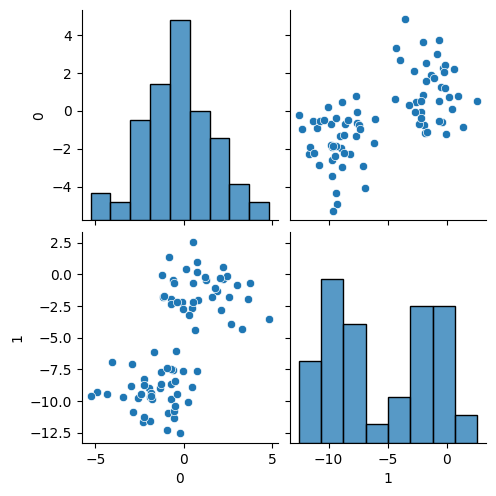

In [ ]:
sns.pairplot(pd.DataFrame(X_train))

<Axes: >

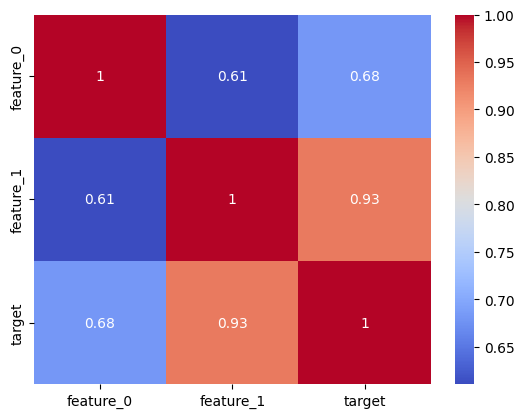

In [ ]:
df_train = pd.DataFrame(X_train, columns=['feature_0', 'feature_1'])
df_train['target'] = y_train
cors = df_train.corr()
sns.heatmap(cors, annot=True, cmap='coolwarm')

In [ ]:
model = NaiveBayes()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


## Conclusion

This notebook demonstrates the implementation and application of a Naive Bayes classifier from scratch.

**Procedure:**
1.  **Data Generation:** Synthetic dataset created using `make_blobs` with 2 classes for classification.
2.  **Model Implementation:** A `NaiveBayes` class was implemented from scratch, including `fit`, `predict`, `_predict_one`, and `_gaussian_pdf` methods.
3.  **Data Splitting:** The dataset was split into training and testing sets.
4.  **Exploratory Data Analysis:** Basic EDA was performed, including pair plots and correlation heatmaps of the training data.
5.  **Model Training:** The custom Naive Bayes model was trained on the `X_train` and `y_train` data.
6.  **Prediction:** Predictions were made on the `X_test` data.
7.  **Evaluation:** The accuracy of the model was calculated.

**Outcome:**
TheThe Naive Bayes model achieved an accuracy of **100.00%** on the test set, indicating excellent performance on this synthetic dataset. This demonstrates a successful end-to-end machine learning workflow using a custom-built classifier.